Точка(3.522) = 33.8524
Точка(3.905) = 49.65

Точка(3.643) = 38.2063
Точка(4.005) = 54.8714

Точка(3.675) = 39.4487
Точка(3.852) = 47.0872


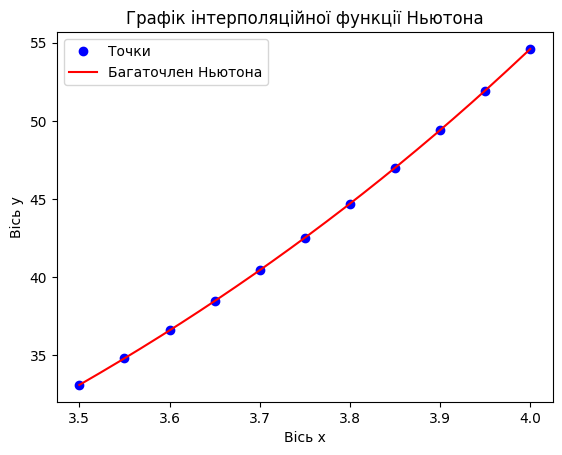

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(3.50, 4.0 + 0.05, 0.05)
y = np.array([33.1154,34.8133,36.5982,38.4747,40.4473,42.5211,44.7012,46.9931,49.4024,51.9354,54.5982])

# Перша інтерполяція
def first_interpolation(x, y, x0):
  n = len(x)
  f = np.zeros((n, n))
  f[:, 0] = y

  for j in range(1, n):
    for i in range(n - j):
      f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])

  res = 0
  for j in range(n):
    prod = f[0, j]
    for i in range(j):
      prod *= (x0 - x[i])
    res += prod
  return res

# Друга інтерполяція
def second_interpolation(x, y, x0):
  n = len(x)
  f = np.zeros((n, n))
  f[:, 0] = y

  for j in range(1, n):
    for i in range(n - j):
      f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])

  res = f[0, 0]
  for j in range(1, n):
    prod = f[0, j]
    for i in range(j):
      prod *= (x0 - x[i])
    res += prod
  return res

x1 = 3.522
x2 = 3.905
y1 = first_interpolation(x, y, x1)
y2 = second_interpolation(x, y, x2)
print(f"Точка({x1}) = {y1.round(4)}")
print(f"Точка({x2}) = {y2.round(4)}\n")

x1 = 3.643
x2 = 4.005
y1 = first_interpolation(x, y, x1)
y2 = second_interpolation(x, y, x2)
print(f"Точка({x1}) = {y1.round(4)}")
print(f"Точка({x2}) = {y2.round(4)}\n")

x1 = 3.675
x2 = 3.852
y1 = first_interpolation(x, y, x1)
y2 = second_interpolation(x, y, x2)
print(f"Точка({x1}) = {y1.round(4)}")
print(f"Точка({x2}) = {y2.round(4)}")

xx = np.linspace(np.min(x), np.max(x), 200)
yy = np.zeros_like(xx)
for i in range(len(xx)):
 yy[i] = second_interpolation(x, y, xx[i])
plt.plot(x, y, 'o', color = 'blue', label='Точки')
plt.plot(xx, yy, color = 'red', label="Багаточлен Ньютона")
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("Вісь x")
plt.ylabel("Вісь y")
plt.legend()
plt.show()